In [144]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import demoji
import spacy

import plotly.graph_objects as go
from PIL import ImageColor, Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px


In [145]:
# colormaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 
#              'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
#              'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
#              'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
#              'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
#              'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 
#              'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
#              'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
#              'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
#              'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
#              'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
#              'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
#              'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
#              'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
#              'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
#              'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
#              'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
#              'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
#              'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
#              'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
#              'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 
#              'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
#              'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
#              'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
#              'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
#              'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
#              'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
#              'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Load DataSet and Data Dictionary

In [146]:
# main_dir = 
Dataset_name = 'TechLabsDataset.csv' 
DataDictionary_name = 'TechLabsDataset_Dictionary.csv'

Dataset = pd.read_csv(os.path.join('D:/00_Coding/16_TechLabs/01_GroupProject/TOMlogistics/Data',Dataset_name), index_col = 0)
DataDictionary = pd.read_csv(os.path.join('D:/00_Coding/16_TechLabs/01_GroupProject/TOMlogistics/Data',DataDictionary_name), index_col = 0)
Dataset.head()

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG


In [147]:
review_df = pd.DataFrame(Dataset[~Dataset['review_EN'].isnull()]['review_EN'])
review_df.head()


,review_EN
3,Best employer ever. Worked there for approxima...
4,better place with very good people everything ...
5,Nice
6,Good firm. The staff are very welcoming and f...
7,"Top company, and coffee, so recommended\r\n\r\n"


In [148]:
# find emo
def find_emo(text):
    # find emoji and add to list
    all_emoji = demoji.findall(text)
    emo = ''
    if len(all_emoji)>0:
        for i,j in enumerate(all_emoji):
            # list emo
            emo = emo+','+all_emoji[j]
    return emo


# replace emo with empty text
def replace_emo(text):
    # find emo and replce with empty text
    all_emoji = demoji.findall(text)

    if len(all_emoji)>0:
        for i,j in enumerate(all_emoji):
            text = text.replace(j,'')
    return text

In [149]:
# add emo
review_df['emo'] = review_df['review_EN'].apply(lambda x: find_emo(x))

In [150]:
review_df.head()

,review_EN,emo
3,Best employer ever. Worked there for approxima...,
4,better place with very good people everything ...,
5,Nice,
6,Good firm. The staff are very welcoming and f...,
7,"Top company, and coffee, so recommended\r\n\r\n",


In [151]:
# add review with no emo
review_df['review_no_emo'] = review_df['review_EN'].apply(lambda x: replace_emo(x))
# review_df[review_df['emo']!=''][['review_no_emo','emo']]

In [152]:
review_df.head()

,review_EN,emo,review_no_emo
3,Best employer ever. Worked there for approxima...,,Best employer ever. Worked there for approxima...
4,better place with very good people everything ...,,better place with very good people everything ...
5,Nice,,Nice
6,Good firm. The staff are very welcoming and f...,,Good firm. The staff are very welcoming and f...
7,"Top company, and coffee, so recommended\r\n\r\n",,"Top company, and coffee, so recommended\r\n\r\n"


# NLP pre-processing on review_df['review_no_emo']


In [153]:
# get clean lemmas
def get_clean_lemma(text):  
    text = [token.lemma_ for token in nlp(text.lower()) if
                  not token.is_punct
                  and not token.is_currency
                  and not token.is_digit
                  and not token.is_punct
    #               and not token.is_oov# is out of vocabulary
                  and not token.is_space
                  and not token.is_stop
                  and not token.like_num
                  and not token.pos_ in ['SYM','SPACE',#'ADJ',
                                         'SCONJ','PUNCT', 'X', 'ADP',
                                         'AUX','CCONJ','DET','INTJ',
                                         'NUM','PART','PRON']
                          ]
    return text




In [154]:

# check attribute of token in spacy: https://spacy.io/api/token

# list of stop words in spacy
# spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
# print('Number of stop words: %d' % len(spacy_stopwords))
# print('First ten stop words: %s' % list(spacy_stopwords))

nlp = spacy.load("en_core_web_sm")

review_df['text_lemmas'] = review_df['review_no_emo'].apply(lambda x: get_clean_lemma(x))


In [155]:
review_df.head()

,review_EN,emo,review_no_emo,text_lemmas
3,Best employer ever. Worked there for approxima...,,Best employer ever. Worked there for approxima...,"[good, employer, work, approximately, year, ti..."
4,better place with very good people everything ...,,better place with very good people everything ...,"[well, place, good, people, perfect]"
5,Nice,,Nice,[nice]
6,Good firm. The staff are very welcoming and f...,,Good firm. The staff are very welcoming and f...,"[good, firm, staff, welcoming, friendly, thank..."
7,"Top company, and coffee, so recommended\r\n\r\n",,"Top company, and coffee, so recommended\r\n\r\n","[company, coffee, recommend]"


In [156]:

concatenate_all_tokens = sum(review_df['text_lemmas'].tolist(),[])
from collections import Counter


word_counts = Counter(concatenate_all_tokens)


In [157]:
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['word','#']
word_counts_df.sort_values('#',ascending = False, inplace = True)


In [158]:
word_counts_df

,word,#
32,company,769
0,good,583
5,time,529
93,delivery,482
70,driver,430
...,...,...
2191,blow,1
2190,whistle,1
2188,tribute,1
2186,minor,1


In [159]:
word_counts_df['tag'] = word_counts_df['word'].apply(lambda x: nlp(x)[0].pos_)

In [160]:
word_counts_df = word_counts_df[~word_counts_df['tag'].isin(['SYM','SPACE',#'ADJ',
                                         'SCONJ','PUNCT', 'X', 'ADP',
                                         'AUX','CCONJ','DET','INTJ',
                                         'NUM','PART','PRON','PROPN'])]



In [161]:
print(np.unique(word_counts_df['tag']))


['ADJ' 'ADV' 'NOUN' 'VERB']


In [162]:
freq_thr = 10
most_freq_df = pd.DataFrame([])

for i in np.unique(word_counts_df['tag']):
    most_freq_df = pd.concat([most_freq_df,
                               word_counts_df[(word_counts_df['tag']==i) & (word_counts_df['#']>=freq_thr)]],
                             axis = 0)


In [163]:
most_freq_df.shape

(452, 3)

In [164]:

remove =['spreuwel','mediamarkt','hornbach','netherlands','english',
         'nl','eindhoven','germany','deliverer','quantum','ea','logistic',
         'company','pm','p.m.','am','a.m.','work']
most_freq_df = most_freq_df[~most_freq_df['word'].isin(remove)]
most_freq_df.loc[most_freq_df['word']=='cmr','tag'] = 'NOUN'

In [165]:
most_freq_df.loc[most_freq_df['word']=='cmr']

,word,#,tag
505,cmr,14,NOUN


In [166]:
most_freq_df['tag'].value_counts().sum()

444

In [167]:
agg_words_df = pd.DataFrame([])
for i in np.unique(most_freq_df['tag']):
    aggre_df = pd.DataFrame(most_freq_df[most_freq_df['tag']==i].groupby('#')['word'].apply(list))
    aggre_df['#'] = np.unique(most_freq_df[most_freq_df['tag']==i]['#'])
    aggre_df['tag'] = i
    agg_words_df = pd.concat([agg_words_df,aggre_df], axis= 0)
    

In [168]:

agg_words_df['word_list'] = agg_words_df['word'].apply(lambda x: ', '.join(map(str,x)))


In [169]:
agg_words_df['tag'].value_counts()


NOUN    75
VERB    56
ADJ     45
ADV     26
Name: tag, dtype: int64

In [170]:
# https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/

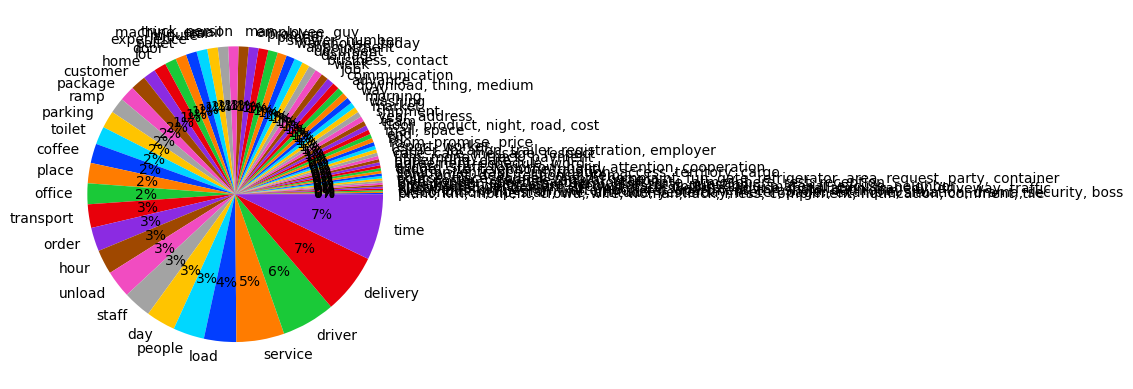

In [171]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='NOUN']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='NOUN']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

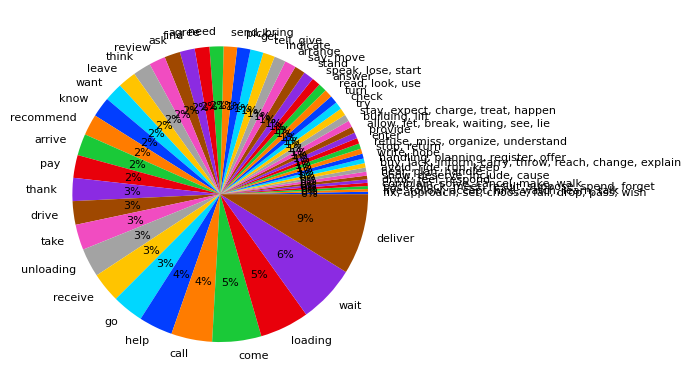

In [172]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='VERB']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='VERB']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',textprops={'fontsize': 8})
  
# displaying chart
plt.show()

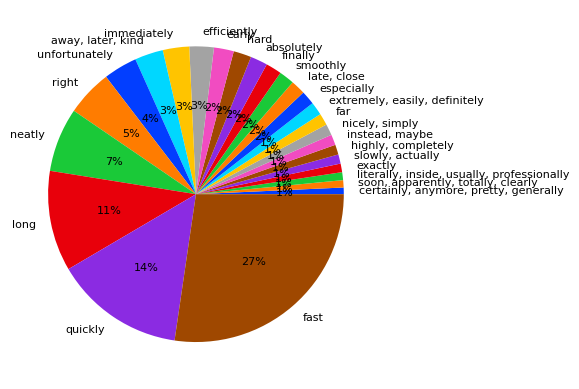

In [173]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='ADV']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='ADV']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',textprops={'fontsize': 8})
  
# displaying chart
plt.show()

C:\Users\KA\anaconda3\envs\myenviro\lib\site-packages\seaborn\categorical.py:3202: UserWarning:

Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.

C:\Users\KA\anaconda3\envs\myenviro\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



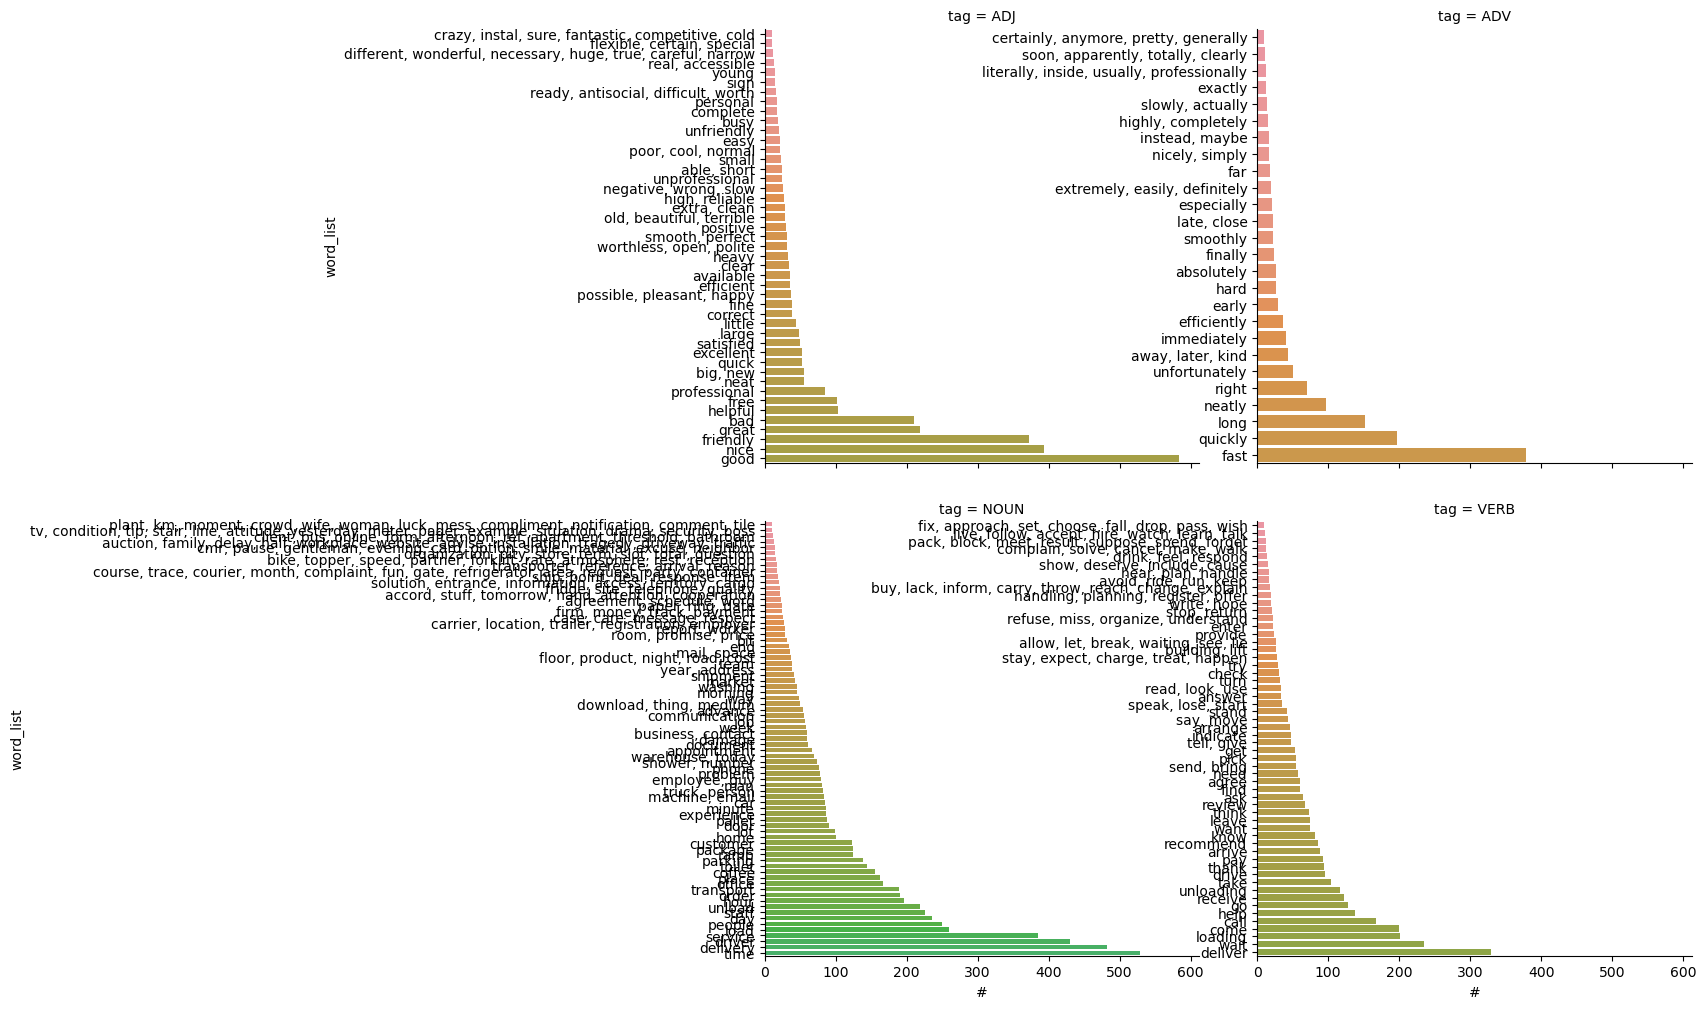

In [174]:
sns.catplot(
    data=agg_words_df, y="word_list", x="#", col="tag",col_wrap=2,
    kind="bar",sharey=False
)

(-0.5, 399.5, 199.5, -0.5)

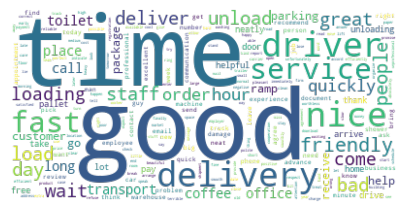

In [175]:
most_freq_df.head()
freq_dict={}
N_words = most_freq_df.shape[0]
for i in np.arange(N_words):
    freq_dict[most_freq_df['word'].iloc[i]]=most_freq_df['#'].iloc[i]
    
wc_img = WordCloud(background_color=None,#collocation_threshold=80,mask=wave_mask,
               contour_color='white',max_words=N_words,min_word_length=3,
               mode ="RGBA",collocations=False,repeat=True)#max_font_size = 40,
#print(txt_to_use.tolist())
wc_img = wc_img.generate_from_frequencies(frequencies=freq_dict)

fig,ax =plt.subplots(figsize=(5,8))
ax.imshow(wc_img, interpolation='bilinear')
ax.axis("off")

In [209]:
def get_rgb_color_list(color_palette,n_colors):
    """
        generate a list of rgb color from color_palette
    
    
    inputs: color_palette,string e.g.'Grays'
            n_colors,integer indicating how many colors should be generates
    
    outputs:
            color_list_rgb,list containing color stings e.g. [(255,255,129),(243,198,244),..]
            """
    color_list = sns.color_palette(palette=color_palette, n_colors=n_colors)
    color_list=color_list.as_hex()
    color_list_rgb =list()
    for h in color_list:
        color_list_rgb.append(ImageColor.getcolor(h, "RGB"))
    #color_list_rgb.append([(0,0,0)])
    return color_list_rgb

def change_image_color(wave_mask,color_rgb,opacity):
    """
        filter colors in image mask and change opacity
    
    
    inputs: wave_mask,matrix (n,m,4)containing colors in rgba
            color_rgb,color in rgb e.g.(0,0,0)
            pltsize,[width,height] e.g.[400,600] 
            opacity,float between 0 and 1
    outputs:
            wave_mask,matrix (n,m,4)containing colors in rgba of the image mask
            """
    red,green,blue,alpha=wave_mask.T
    white_areas=(red>128)&(blue>128)&(green>128)
    wave_mask[...,:][white_areas.T]=(255,255,255,255)
    red,green,blue,alpha=wave_mask.T
    white_areas=(red<128)&(blue<128)&(green<128)
    wave_mask[...,:][white_areas.T]=color_rgb+(int(225*opacity),)
    return wave_mask

def plot_wordscloud(image_path,tags,color_mask,pltsize,opacity,colormap_text):
    """
        generate wordscloud visualization compatible with plotly
    
    
    inputs:
            image_path, string indicating the path of the image mask to load
            tags, dataframe with 'word' and count'#'
            color_mask,rgb e.g.(0,0,0)
            pltsize,[width,height] e.g.[400,600] 
            opacity,float between 0 and 1
    outputs:
            wc_img,image of wordscloud not suitable for plotly -to be used for verification
            fig, figure handle suitable for plotly
            wave_mask,matrix (n,m,4)containing colors in rgba of the image mask
            """

    
    # generate a mask with the input picture
    wave_mask = np.array(Image.open(image_path).convert('RGBA'))

    #wave_mask=np.insert(wave_mask,1,opacity*np.ones((wave_mask.shape[0],wave_mask.shape[1])),2)
    wave_mask=change_image_color(wave_mask,color_mask,opacity)
    freq_dict={}
    N_words = tags.shape[0]
    for i in np.arange(N_words):
        freq_dict[tags['word'].iloc[i]]=tags['#'].iloc[i]

    
    
    #generate wordcloud from package
    
    wc_img = WordCloud(mask=wave_mask,background_color=None,#collocation_threshold=80,
                   contour_color='black',max_words=N_words,#min_word_length=3,
                   mode ="RGBA",repeat=False,colormap = colormap_text)#,max_font_size = 80)#max_font_size = 40,
    #print(txt_to_use.tolist())
    wc_img = wc_img.generate_from_frequencies(frequencies=freq_dict)
    
    
#    fig,ax =plt.subplots(figsize=(5,8))
#    ax.imshow(wc_img, interpolation='bilinear')
#    ax.axis("off")

    # string, font size, position, orientation and color.
    # get wc layout
    var_str =[wc_img.layout_[i][0][0] for i in np.arange(len(wc_img.layout_))]#string

    var_freq =[wc_img.layout_[i][0][1] for i in np.arange(len(wc_img.layout_))]#frequency
    var_size =[wc_img.layout_[i][1] for i in np.arange(len(wc_img.layout_))]#size
    var_position =np.asarray([[wc_img.layout_[i][2][0],wc_img.layout_[i][2][1]] for i in np.arange(len(wc_img.layout_))])#position
    var_position[:,0]=var_position[:,0]#-0.2*var_position[:,0]#-0.8*np.mean(var_position[:,0])
    var_position[:,1]=var_position[:,1]#-0.2*var_position[:,1]#-0.8*np.mean(var_position[:,1])
    var_oriet =[wc_img.layout_[i][3] for i in np.arange(len(wc_img.layout_))]#orientation
    var_color =[wc_img.layout_[i][4] for i in np.arange(len(wc_img.layout_))]#color
    
    all_wc=pd.DataFrame([var_str,var_freq,var_size,var_position[:,0],var_position[:,1],var_oriet,var_color]).T
    all_wc.columns=['var_str','var_freq','var_size','var_x','var_y','var_oriet','var_color']
    
    # split words per orienation
    idx_or1= np.where(np.asarray(var_oriet)==2)[0]# vertical words
    idx_or2= np.where(np.asarray(var_oriet)==None)[0]#orizontal words


    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    #generate wordcloud compatible with plotly
    
    fig = go.Figure(layout = layout,data =px.imshow(wave_mask))#, 
    fig.update_traces(hoverinfo='none', hovertemplate='')
    #add annotation of vertical text
    for i in idx_or1:
        fig.add_annotation(y=np.asarray(var_position)[i,0],
             x=np.asarray(var_position)[i,1],
             text=np.asarray(var_str)[i],
             textangle=90,
             showarrow=False,
             xanchor="left",
             yanchor="top",
             #clicktoshow='onout',
             #captureevents=True,
             hovertext='# '+str(tags['#'].loc[tags['word']==np.asarray(var_str)[i]].values[0]),
                           font=dict(
                    color=np.asarray(var_color)[i],
                    size=np.asarray(var_size)[i]+5,
                    family='Droid Sans Mono',
                    
                ))
    #add annotation of horizontal text
    for i in idx_or2:    
        #print(np.asarray(var_str)[i])
        fig.add_annotation(y=np.asarray(var_position)[i,0],
             x=np.asarray(var_position)[i,1],
             text=np.asarray(var_str)[i],
             textangle=0,
             showarrow=False,
             xanchor="left",
             yanchor="top",
             hovertext='# '+str(tags['#'].loc[tags['word']==np.asarray(var_str)[i]].values[0]),
             font=dict(
                    color=np.asarray(var_color)[i],
                    size=np.asarray(var_size)[i]+5,
                    family='Droid Sans Mono'
                ))
    
#     fig.update_traces(textposition='inside')
    fig.update_yaxes(autorange="reversed")
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(
        paper_bgcolor='rgb(255,255,255)',
        plot_bgcolor='rgb(255,255,255)', 
        width=pltsize[0],
        height=pltsize[1],
        margin=dict(l=1, r=1, t=1, b=1)
        )
    fig.update_layout(clickmode='select')

    
    return(wc_img,fig,wave_mask)


In [177]:
image_path = './figures/truck.png'
pltsize = [500,500]
opacity = 0.5
color_list_rgb_list = get_rgb_color_list('Greens',5)
color_mask = color_list_rgb_list[4]
tags = most_freq_df[most_freq_df['tag']=='ADV']
colormap_text = 'Greys_r'
wc_img,fig,wave_mask = plot_wordscloud(image_path,tags,color_mask,pltsize,opacity, colormap_text)

#    fig,ax =plt.subplots(figsize=(5,8))
#    ax.imshow(wc_img, interpolation='bilinear')
#    ax.axis("off")
fig
# NOUN    39
# VERB    32
# ADJ     11
# ADV      6

FileNotFoundError: [Errno 2] No such file or directory: './figures/truck.png'

In [178]:
# adjacency matrix

In [179]:
lexicon = most_freq_df['word'].tolist()
len_lex = len(lexicon)
# lexicon_adjmat

In [180]:
np.unique(most_freq_df['tag'])

array(['ADJ', 'ADV', 'NOUN', 'VERB'], dtype=object)

In [181]:
col_tags = get_rgb_color_list('BuGn',len(np.unique(most_freq_df['tag'])))
col_tags  = ['blue','red','yellow','green']
dict_col = {}
for j,i in enumerate(np.unique(most_freq_df['tag'])):
    dict_col[i] = col_tags[j]


In [182]:
most_freq_df['col_tag'] = most_freq_df['tag'].apply(lambda x: dict_col[x])
most_freq_df.head()

,word,#,tag,col_tag
0,good,583,ADJ,blue
24,nice,394,ADJ,blue
28,friendly,372,ADJ,blue
82,great,219,ADJ,blue
63,bad,210,ADJ,blue


In [183]:
print(lexicon)
lexicon_adjmat = np.zeros((len_lex,len_lex))
lexicon_adjmat = pd.DataFrame(lexicon_adjmat,columns = lexicon, index = lexicon)
for i in np.arange(review_df['text_lemmas'].shape[0]):
    intersec = list(set(review_df['text_lemmas'].iloc[i]).intersection(set(lexicon)))
    lexicon_adjmat.loc[intersec,intersec] = lexicon_adjmat.loc[intersec,intersec]+ 1

['good', 'nice', 'friendly', 'great', 'bad', 'helpful', 'free', 'professional', 'neat', 'big', 'new', 'quick', 'excellent', 'satisfied', 'large', 'little', 'correct', 'fine', 'possible', 'pleasant', 'happy', 'efficient', 'available', 'clear', 'heavy', 'worthless', 'open', 'polite', 'smooth', 'perfect', 'positive', 'old', 'beautiful', 'terrible', 'extra', 'clean', 'high', 'reliable', 'negative', 'wrong', 'slow', 'unprofessional', 'able', 'short', 'small', 'poor', 'cool', 'normal', 'easy', 'unfriendly', 'busy', 'complete', 'personal', 'ready', 'antisocial', 'difficult', 'worth', 'sign', 'cmr', 'young', 'real', 'accessible', 'different', 'wonderful', 'necessary', 'huge', 'true', 'careful', 'narrow', 'flexible', 'certain', 'special', 'crazy', 'instal', 'sure', 'fantastic', 'competitive', 'cold', 'fast', 'quickly', 'long', 'neatly', 'right', 'unfortunately', 'away', 'later', 'kind', 'immediately', 'efficiently', 'early', 'hard', 'absolutely', 'finally', 'smoothly', 'late', 'close', 'especia

In [184]:
lexicon_adjmat.loc[intersec,intersec]

""


In [185]:
lexicon_adjmat

,good,nice,friendly,great,bad,helpful,free,professional,neat,big,...,learn,talk,fix,approach,set,choose,fall,drop,pass,wish
good,537.0,48.0,64.0,32.0,22.0,16.0,17.0,17.0,7.0,10.0,...,2.0,0.0,2.0,4.0,1.0,3.0,3.0,1.0,1.0,2.0
nice,48.0,364.0,38.0,19.0,11.0,18.0,10.0,9.0,7.0,9.0,...,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
friendly,64.0,38.0,365.0,24.0,7.0,50.0,11.0,12.0,16.0,5.0,...,2.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0
great,32.0,19.0,24.0,205.0,5.0,8.0,5.0,6.0,5.0,4.0,...,2.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
bad,22.0,11.0,7.0,5.0,182.0,2.0,1.0,5.0,3.0,7.0,...,0.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
choose,3.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,3.0,...,1.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0
fall,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
drop,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0
pass,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,1.0


In [103]:
import plotly.graph_objects as go
import networkx as nx
import plotly.express as px
from plotly.offline import plot

ad_mat = lexicon_adjmat.values

G = nx.DiGraph(ad_mat)
nx.draw(G)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D74650D160> (for post_execute):



KeyboardInterrupt



In [243]:
G = nx.from_numpy_matrix(ad_mat)
# pos = nx.kamada_kawai_layout(G)
pos = nx.spectral_layout(G)


def sigmoid(x):
    y = 10 / (1 + np.exp(-(x-5)/1.9))
    return y

In [189]:
#sorting original lexicon_adjmat by word 'good'
lexicon_adjmat_copy_good = lexicon_adjmat.copy()

lexicon_adjmat_sorted_x = lexicon_adjmat_copy_good.sort_values(by='good', axis=1, ascending=False)
lexicon_adjmat_sorted_xy = lexicon_adjmat_sorted_x.sort_values(by='good', axis=0, ascending=False)
lexicon_adjmat_good=lexicon_adjmat_sorted_xy
lexicon_adjmat_good


,good,service,fast,time,friendly,delivery,driver,nice,people,staff,...,card,drink,notification,ring,miss,antisocial,different,necessary,fantastic,clearly
good,537.0,92.0,68.0,66.0,64.0,61.0,55.0,48.0,46.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
service,92.0,337.0,45.0,62.0,63.0,85.0,56.0,45.0,18.0,13.0,...,0.0,0.0,1.0,4.0,3.0,3.0,1.0,5.0,3.0,0.0
fast,68.0,45.0,368.0,18.0,62.0,25.0,19.0,35.0,27.0,41.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
time,66.0,62.0,18.0,423.0,67.0,130.0,84.0,43.0,33.0,24.0,...,1.0,1.0,3.0,9.0,8.0,2.0,3.0,5.0,2.0,6.0
friendly,64.0,63.0,62.0,67.0,365.0,77.0,64.0,38.0,53.0,84.0,...,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
antisocial,0.0,3.0,0.0,2.0,0.0,3.0,9.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,15.0,0.0,0.0,0.0,0.0
different,0.0,1.0,1.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
necessary,0.0,5.0,1.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0
fantastic,0.0,3.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


In [190]:
#dropping diagonal values

for i in range(len(lexicon_adjmat_good.index)):
    for j in range(len(lexicon_adjmat_good.columns)):
        if i==j:
            lexicon_adjmat_good.iloc[i,j] = 0
lexicon_adjmat_good


,good,service,fast,time,friendly,delivery,driver,nice,people,staff,...,card,drink,notification,ring,miss,antisocial,different,necessary,fantastic,clearly
good,0.0,92.0,68.0,66.0,64.0,61.0,55.0,48.0,46.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
service,92.0,0.0,45.0,62.0,63.0,85.0,56.0,45.0,18.0,13.0,...,0.0,0.0,1.0,4.0,3.0,3.0,1.0,5.0,3.0,0.0
fast,68.0,45.0,0.0,18.0,62.0,25.0,19.0,35.0,27.0,41.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
time,66.0,62.0,18.0,0.0,67.0,130.0,84.0,43.0,33.0,24.0,...,1.0,1.0,3.0,9.0,8.0,2.0,3.0,5.0,2.0,6.0
friendly,64.0,63.0,62.0,67.0,0.0,77.0,64.0,38.0,53.0,84.0,...,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
antisocial,0.0,3.0,0.0,2.0,0.0,3.0,9.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
different,0.0,1.0,1.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
necessary,0.0,5.0,1.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
fantastic,0.0,3.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# creating dictionary of labels for word 'good'

labels_good=lexicon_adjmat_good.index
dict_good = { i : labels_good[i] for i in range(0, len(labels_good) ) }
dict_good

{0: 'good',
 1: 'service',
 2: 'fast',
 3: 'time',
 4: 'friendly',
 5: 'delivery',
 6: 'driver',
 7: 'nice',
 8: 'people',
 9: 'staff',
 10: 'transport',
 11: 'place',
 12: 'load',
 13: 'deliver',
 14: 'great',
 15: 'unload',
 16: 'day',
 17: 'loading',
 18: 'business',
 19: 'coffee',
 20: 'communication',
 21: 'thank',
 22: 'go',
 23: 'office',
 24: 'recommend',
 25: 'wait',
 26: 'experience',
 27: 'bad',
 28: 'come',
 29: 'customer',
 30: 'hour',
 31: 'pay',
 32: 'quickly',
 33: 'take',
 34: 'order',
 35: 'think',
 36: 'toilet',
 37: 'free',
 38: 'professional',
 39: 'lot',
 40: 'parking',
 41: 'receive',
 42: 'helpful',
 43: 'guy',
 44: 'job',
 45: 'review',
 46: 'help',
 47: 'long',
 48: 'problem',
 49: 'payment',
 50: 'car',
 51: 'pallet',
 52: 'employee',
 53: 'number',
 54: 'neatly',
 55: 'contact',
 56: 'truck',
 57: 'ramp',
 58: 'price',
 59: 'pick',
 60: 'expect',
 61: 'leave',
 62: 'firm',
 63: 'man',
 64: 'machine',
 65: 'team',
 66: 'thing',
 67: 'employer',
 68: 'call',
 

In [137]:
#taking 50 first cells
lexicon_good_50 = lexicon_adjmat_good.iloc[0:50, 0:50]
lexicon_good_50 

#delivery_30 = delivery_adjmat_sorted_xy.iloc[0:30, 0:30]

,good,service,fast,time,friendly,delivery,driver,nice,people,staff,...,parking,receive,helpful,guy,job,review,help,long,problem,payment
good,0.0,92.0,68.0,66.0,64.0,61.0,55.0,48.0,46.0,42.0,...,17.0,17.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0
service,92.0,0.0,45.0,62.0,63.0,85.0,56.0,45.0,18.0,13.0,...,9.0,23.0,16.0,15.0,3.0,9.0,22.0,6.0,6.0,3.0
fast,68.0,45.0,0.0,18.0,62.0,25.0,19.0,35.0,27.0,41.0,...,28.0,1.0,13.0,6.0,3.0,3.0,6.0,4.0,6.0,2.0
time,66.0,62.0,18.0,0.0,67.0,130.0,84.0,43.0,33.0,24.0,...,12.0,52.0,20.0,15.0,13.0,27.0,19.0,87.0,13.0,6.0
friendly,64.0,63.0,62.0,67.0,0.0,77.0,64.0,38.0,53.0,84.0,...,12.0,16.0,50.0,12.0,5.0,12.0,33.0,6.0,7.0,1.0
delivery,61.0,85.0,25.0,130.0,77.0,0.0,73.0,46.0,19.0,9.0,...,2.0,52.0,37.0,34.0,11.0,29.0,22.0,17.0,14.0,0.0
driver,55.0,56.0,19.0,84.0,64.0,73.0,0.0,37.0,17.0,14.0,...,13.0,34.0,19.0,5.0,2.0,23.0,21.0,15.0,10.0,0.0
nice,48.0,45.0,35.0,43.0,38.0,46.0,37.0,0.0,83.0,54.0,...,13.0,16.0,18.0,19.0,12.0,6.0,17.0,9.0,13.0,1.0
people,46.0,18.0,27.0,33.0,53.0,19.0,17.0,83.0,0.0,7.0,...,7.0,5.0,13.0,5.0,8.0,8.0,16.0,4.0,9.0,3.0
staff,42.0,13.0,41.0,24.0,84.0,9.0,14.0,54.0,7.0,0.0,...,17.0,2.0,11.0,3.0,2.0,2.0,5.0,12.0,2.0,0.0


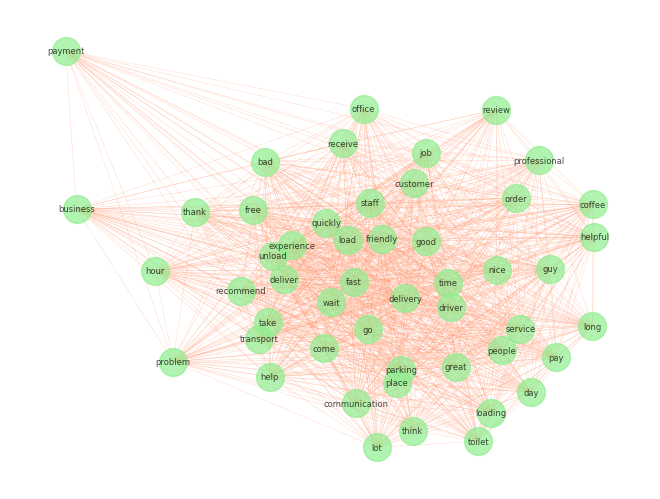

In [283]:
#plot of 50 words connected to word 'good'

ad_mat_50_good = lexicon_good_50.values

G = nx.DiGraph(ad_mat_50)
              
#labels
mapping = dict_good
relabeled_G = nx.relabel_nodes(G,mapping)


#graph
nx.draw(relabeled_G, arrows=False,
        edge_color='lightsalmon', 
        width=0.1,
        with_labels=True,
        font_size=6,
        node_size=400,
        node_color='lightgreen',
        alpha=0.7)







In [202]:
#sorting original lexicon_adjmat by word 'delivery'
lexicon_adjmat_copy_delivery = lexicon_adjmat.copy()

lexicon_adjmat_sorted_x = lexicon_adjmat_copy_delivery.sort_values(by='delivery', axis=1, ascending=False)
lexicon_adjmat_sorted_xy = lexicon_adjmat_sorted_x.sort_values(by='delivery', axis=0, ascending=False)
lexicon_adjmat_delivery=lexicon_adjmat_sorted_xy
#lexicon_adjmat_delivery


#taking 30 first cells sorted by word 'delivery'
delivery_30 = lexicon_adjmat_delivery.iloc[0:30, 0:30]
#delivery_30


#dropping diagonal values
for i in range(len(delivery_30.index)):
    for j in range(len(delivery_30.columns)):
        if i==j:
            delivery_30.iloc[i,j] = 0
#delivery_30

# creating dictionary of labels for word 'delivery'
labels_delivery=delivery_30.index
dict_delivery = { i : labels_delivery[i] for i in range(0, len(labels_delivery)) }
#dict_delivery





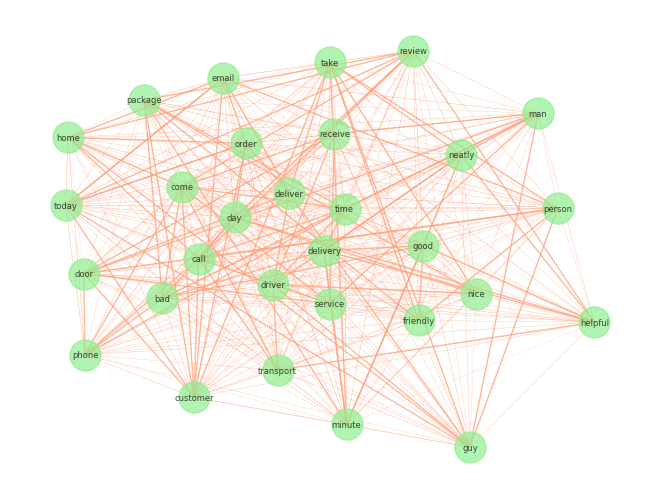

In [206]:
#plot of 30 words connected to word 'delivery'

ad_mat_delivery_30 = delivery_30.values

G = nx.DiGraph(ad_mat_delivery_30)

G.add_edge(0,1, width=1.0)
G.add_edge(1,2, width=0.2)
G.add_edge(2,3, width=0.18)
G.add_edge(3,4, width=0.16)
G.add_edge(4,5, width=0.14)
G.add_edge(5,6, width=0.12)
G.add_edge(6,7, width=0.09)
G.add_edge(7,8, width=0.07)
G.add_edge(8,9, width=0.05)


most_freq_df['col_tag']==

color_map=most_freq_df['col_tag'] = most_freq_df['tag'].apply(lambda x: dict_col[x])
#most_freq_df.head()


weights = nx.get_edge_attributes(G,'width').values()


#labels
mapping = dict_delivery
relabeled_G = nx.relabel_nodes(G,mapping)

nx.draw(relabeled_G, arrows=False,
        edge_color='lightsalmon', 
        width=list(weights),
        with_labels=True,
        font_size=6,
        node_size=500,
        #node_color='lightgreen',
        node_color=color_map,
        alpha=0.7 )

In [250]:
map_colors_df=most_freq_df[['word','col_tag']]
map_colors_df


,word,col_tag
0,good,blue
24,nice,blue
28,friendly,blue
82,great,blue
63,bad,blue
...,...,...
1502,choose,green
67,fall,green
978,drop,green
1909,pass,green


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5]),
 [Text(0.5, 0, 'good'),
  Text(1.5, 0, 'service'),
  Text(2.5, 0, 'fast'),
  Text(3.5, 0, 'time'),
  Text(4.5, 0, 'friendly'),
  Text(5.5, 0, 'delivery'),
  Text(6.5, 0, 'driver'),
  Text(7.5, 0, 'nice'),
  Text(8.5, 0, 'people'),
  Text(9.5, 0, 'staff'),
  Text(10.5, 0, 'transport'),
  Text(11.5, 0, 'place'),
  Text(12.5, 0, 'load'),
  Text(13.5, 0, 'deliver'),
  Text(14.5, 0, 'great'),
  Text(15.5, 0, 'unload'),
  Text(16.5, 0, 'day'),
  Text(17.5, 0, 'loading'),
  Text(18.5, 0, 'business'),
  Text(19.5, 0, 'coffee'),
  Text(20.5, 0, 'communication'),
  Text(21.5, 0, 'thank'),
  Text(22.5, 0, 'go'),
  Text(23.5, 0, 'office'),
  Text(24.5, 0, 'recom

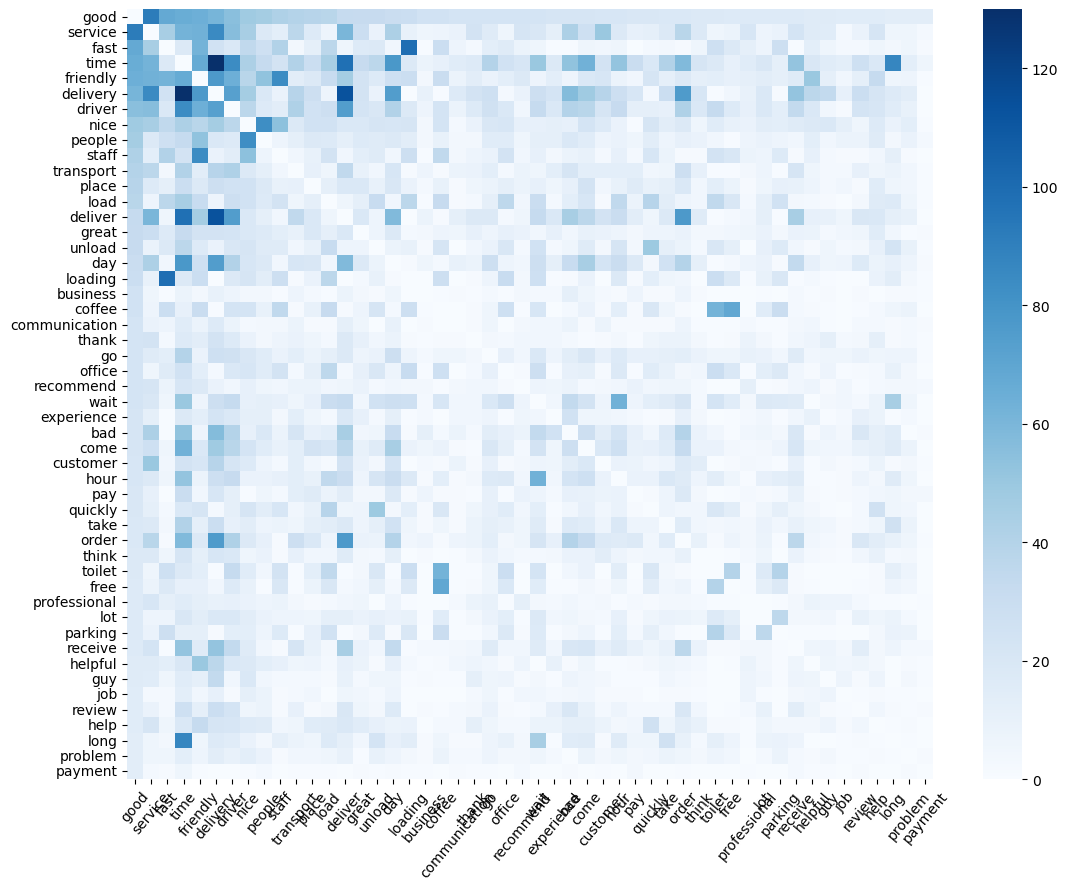

In [285]:
fig, ax = plt.subplots(figsize = (13,10))
sns.heatmap(lexicon_50, cmap = "Blues")
plt.xticks(rotation=50)
#plt.savefig("heatmap.png", dpi = 300)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'delivery'),
  Text(1.5, 0, 'time'),
  Text(2.5, 0, 'deliver'),
  Text(3.5, 0, 'service'),
  Text(4.5, 0, 'call'),
  Text(5.5, 0, 'friendly'),
  Text(6.5, 0, 'order'),
  Text(7.5, 0, 'day'),
  Text(8.5, 0, 'driver'),
  Text(9.5, 0, 'good'),
  Text(10.5, 0, 'bad'),
  Text(11.5, 0, 'person'),
  Text(12.5, 0, 'receive'),
  Text(13.5, 0, 'come'),
  Text(14.5, 0, 'nice'),
  Text(15.5, 0, 'email'),
  Text(16.5, 0, 'home'),
  Text(17.5, 0, 'man'),
  Text(18.5, 0, 'package'),
  Text(19.5, 0, 'neatly'),
  Text(20.5, 0, 'customer'),
  Text(21.5, 0, 'transport'),
  Text(22.5, 0, 'door'),
  Text(23.5, 0, 'helpful'),
  Text(24.5, 0, 'guy'),
  Text(25.5, 0, 'today'),
  Text(26.5, 0, 'phone'),
  Text(27.5, 0, 'take'),
  Text(28.5, 0, 'minute'),
  Text(29.5, 0, 'review')])

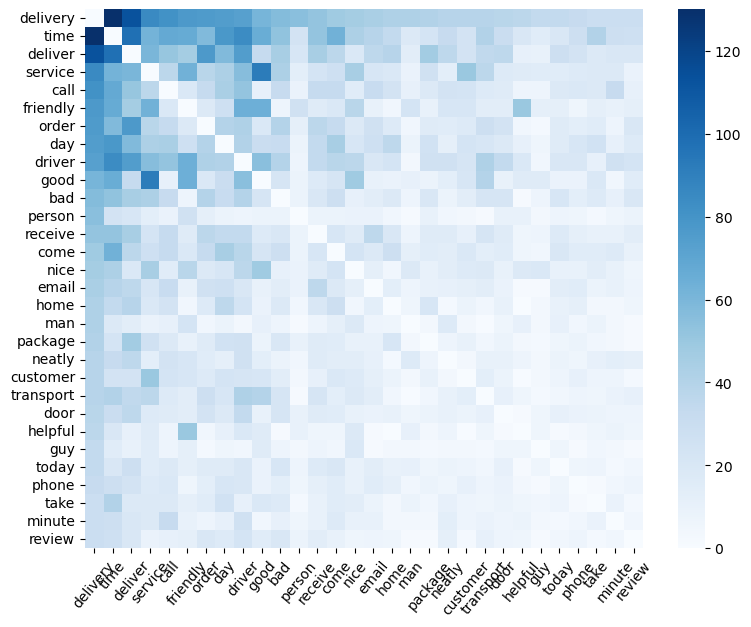

In [286]:
fig, ax = plt.subplots(figsize = (9,7))
sns.heatmap(delivery_30, cmap = "Blues")
plt.xticks(rotation=50)

In [166]:
# for i in np.arange(most_freq_df.shape[0]):
#     G.nodes(data = True)[i]['level'] = most_freq_df['col_tag'].iloc[i]
# pos = nx.multipartite_layout(G, subset_key="level")

In [289]:


edge_x = []
edge_y = []
weight=[]
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight.append(G.get_edge_data(edge[0],edge[1])['weight'])
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
s_w=np.round(sigmoid(np.asarray(weight)),1).tolist()
# s_w=np.round(np.log(weight))
# s_w = weight/100
#color_list = get_rgb_color_list('BuGn',len(weight))
# make multiple traces

middle_node_trace = go.Scatter(
    x=list(),
    y=list(),
    text=list(),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        opacity=0
    ),
    hoverlabel= dict(bgcolor= '#e38078')
)
    
edge_trace=list()
n=0
m=3
for i in np.arange(len(weight)):
    edge_trace.append(go.Scatter(x = edge_x[n:m], 
                               y = edge_y[n:m],
                               hoverinfo='none',
                               hovertext =' ',
                               line=dict(
                            color='rgb(100,200,'+str(int(s_w[i]*25))+')',
                            width=1)#s_w[i])
                            #width=int(weight[i]))#int(s_w[i]))
                            ))
    middle_node_trace['x']+=((edge_x[n]+edge_x[n+1])/2,0)
    middle_node_trace['y']+=((edge_y[n]+edge_y[n+1])/2,0)
    middle_node_trace['text']+=(str(int(weight[i])),0)#+' visits',0)
    n=m
    m=m+3


size_points=pd.DataFrame([node_x,node_y,np.diag(ad_mat)]).T
size_points.columns=['x','y','#']
size_points['lexicon']= lexicon
#size_points['color']='#03dae6'
edge_trace.append(px.scatter(size_points,
                             x='x',y='y',
                             size="#",
                             text='lexicon',
                             color_discrete_map={
        'ADJ': '#d6cbd3',
        'ADV': '#eca1a6',
        'NOUN': '#feb236',
        'VERB':'#ada397',
    
        
    },
                             hover_data= {
                            "x": False,   
                            "y": False,
                            "#": False,
                            "lexicon": False,
                            }
                        ).update_traces(mode='markers+text').data[0])
edge_trace.append(middle_node_trace)   
fig=go.Figure(data=edge_trace)
# fig.update_layout(yaxis_range=[-1.5,1.5],xaxis_range=[-1.5,1.5])
fig.update_layout(width=1000,height=1000,
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))   
fig.update_layout(showlegend=False,
        paper_bgcolor='rgb(255,255,255)',
        plot_bgcolor='rgb(255,255,255)',
        font=dict(
        #family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    ))
#fig.data[15]['marker']['color']=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397'])
#fig.data[17]['marker']['color']=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397'])
fig.for_each_trace(lambda t: t.update(textposition='top center'))
fig.update_traces(marker=dict(color=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397'])))
# fig.update_layout(title_text="<b>Figure 2. Network of reviews' authors across firm types</b>",
#                   title={'x':0.5,'y':0.95,'font':{'family':'Calibri','size':16}})
fig.update_layout(font_family="Calibri",width=1000,height=1000)
#fig.update_xaxes(title={'font':{'family':'Calibri','size':14},
#                                   'text':'Number of firms described by different tags'})
# fig.update_layout(
#     margin=dict(l=0, r=0, t=20, b=0))
plot(fig,config=dict(
                    displayModeBar=False
                ))
    



'temp-plot.html'

In [288]:
#'copied'

edge_x = []
edge_y = []
weight=[]
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight.append(G.get_edge_data(edge[0],edge[1])['weight'])
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
s_w=np.round(sigmoid(np.asarray(weight)),1).tolist()
# s_w=np.round(np.log(weight))
# s_w = weight/100
#color_list = get_rgb_color_list('BuGn',len(weight))
# make multiple traces

middle_node_trace = go.Scatter(
    x=list(),
    y=list(),
    text=list(),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        opacity=0
    ),
    hoverlabel= dict(bgcolor= '#e38078')
)
    
edge_trace=list()
n=0
m=3
for i in np.arange(len(weight)):
    edge_trace.append(go.Scatter(x = edge_x[n:m], 
                               y = edge_y[n:m],
                               hoverinfo='none',
                               hovertext =' ',
                               line=dict(
                            color='rgb(100,200,'+str(int(s_w[i]*25))+')',
                            width=1)#s_w[i])
                            #width=int(weight[i]))#int(s_w[i]))
                            ))
    middle_node_trace['x']+=((edge_x[n]+edge_x[n+1])/2,0)
    middle_node_trace['y']+=((edge_y[n]+edge_y[n+1])/2,0)
    middle_node_trace['text']+=(str(int(weight[i])),0)#+' visits',0)
    n=m
    m=m+3


size_points=pd.DataFrame([node_x,node_y,np.diag(ad_mat)]).T
size_points.columns=['x','y','#']
size_points['lexicon']= lexicon
#size_points['color']='#03dae6'
edge_trace.append(px.scatter(size_points,
                             x='x',y='y',
                             size="#",
                             text='lexicon',
#                             color_discrete_map={
#        'Clothes Ateliers': '#d6cbd3',
#        'Clothes Reciclying': '#eca1a6',
#        'Clothes Reparation': '#feb236',
#        'Clothes Washing':'#ada397',
#         'Textile Sellers':'#6b5b95',
#        
#    },
                             hover_data= {
                            "x": False,   
                            "y": False,
                            "#": False,
                            "lexicon": False,
                            }
                        ).update_traces(mode='markers+text').data[0])
edge_trace.append(middle_node_trace)   
fig=go.Figure(data=edge_trace)
# fig.update_layout(yaxis_range=[-1.5,1.5],xaxis_range=[-1.5,1.5])
fig.update_layout(width=1000,height=1000,
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))   
fig.update_layout(showlegend=False,
        paper_bgcolor='rgb(255,255,255)',
        plot_bgcolor='rgb(255,255,255)',
        font=dict(
        #family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    ))
#fig.data[15]['marker']['color']=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397','#6b5b95'])
#fig.data[17]['marker']['color']=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397','#6b5b95'])
fig.for_each_trace(lambda t: t.update(textposition='top center'))
# fig.update_traces(marker=dict(color=np.asarray(['#d6cbd3','#eca1a6','#feb236','#ada397','#6b5b95'])))
# fig.update_layout(title_text="<b>Figure 2. Network of reviews' authors across firm types</b>",
#                   title={'x':0.5,'y':0.95,'font':{'family':'Calibri','size':16}})
fig.update_layout(font_family="Calibri",width=1000,height=1000)
#fig.update_xaxes(title={'font':{'family':'Calibri','size':14},
#                                   'text':'Number of firms described by different tags'})
# fig.update_layout(
#     margin=dict(l=0, r=0, t=20, b=0))
plot(fig,config=dict(
                    displayModeBar=False
                ))

'temp-plot.html'

In [291]:
#G = nx.complete_multipartite_graph(28, 16, 10)
#pos = nx.multipartite_layout(G, subset_key="level")
#nx.draw(G, pos, with_labels=True)


In [307]:
freq_thr = 51
most_freq_df = pd.DataFrame([])

for i in np.unique(word_counts_df['tag']):
    most_freq_df = pd.concat([most_freq_df,
                               word_counts_df[(word_counts_df['tag']==i) & (word_counts_df['#']>=freq_thr)]],
                             axis = 0)
most_freq_df.shape
most_freq_df


,word,#,tag
0,good,583,ADJ
24,nice,394,ADJ
28,friendly,372,ADJ
82,great,219,ADJ
63,bad,210,ADJ
...,...,...,...
262,need,57,VERB
407,send,55,VERB
7,bring,55,VERB
415,pick,54,VERB


In [ ]:
lexicon = most_freq_df['word'].tolist()
len_lex = len(lexicon)
# lexicon_adjmat